In [12]:
import pandas as pd

# ✅ Load CSV with correct separator
df = pd.read_csv("student-mat.csv", sep=';')

# ✅ Clean column names (remove " quotes)
df.columns = df.columns.str.replace('"', '').str.strip()

# Check first few rows
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,"""5""","""6""",6
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,"""5""","""5""",6
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,"""7""","""8""",10
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,"""15""","""14""",15
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,4,"""6""","""10""",10


In [6]:
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nShape (rows, columns):", df.shape)


Missing values:
 school           0
 sex             0
 age             0
 address         0
 famsize         0
 Pstatus         0
 Medu            0
 Fedu            0
 Mjob            0
 Fjob            0
 reason          0
 guardian        0
 traveltime      0
 studytime       0
 failures        0
 schoolsup       0
 famsup          0
 paid            0
 activities      0
 nursery         0
 higher          0
 internet        0
 romantic        0
 famrel          0
 freetime        0
 goout           0
 Dalc            0
 Walc            0
 health          0
 absences        0
 G1              0
 G2              0
 G3              0
dtype: int64

Data types:
 school           object
 sex             object
 age              int64
 address         object
 famsize         object
 Pstatus         object
 Medu             int64
 Fedu             int64
 Mjob            object
 Fjob            object
 reason          object
 guardian        object
 traveltime       int64
 studytime       

In [7]:
df = df.drop_duplicates()
print("After removing duplicates, new shape:", df.shape)


After removing duplicates, new shape: (395, 33)


In [13]:
print("Average Final Grade (G3):", df['G3'].mean())


Average Final Grade (G3): 10.415189873417722


In [14]:
high_scores = df[df['G3'] > 15]
print("Number of students who scored more than 15 in G3:", high_scores.shape[0])


Number of students who scored more than 15 in G3: 40


In [15]:
correlation = df['studytime'].corr(df['G3'])
print("Correlation between study time and G3:", correlation)


Correlation between study time and G3: 0.09781968965319636


In [16]:
gender_avg = df.groupby('sex')['G3'].mean()
print("Average G3 by Gender:\n", gender_avg)


Average G3 by Gender:
 sex
"F"     9.966346
"M"    10.914439
Name: G3, dtype: float64


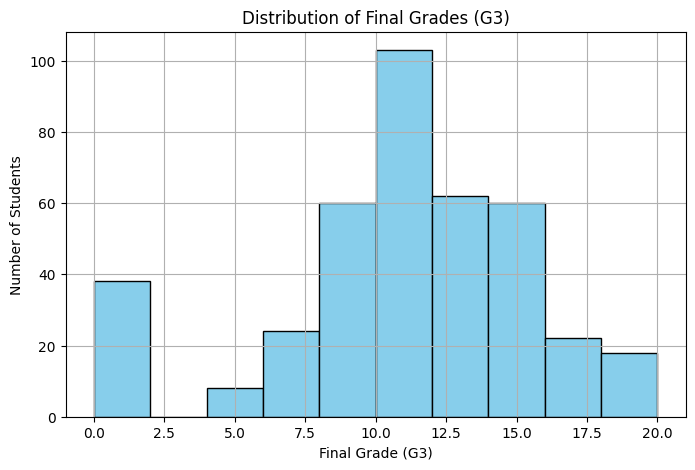

In [17]:
plt.figure(figsize=(8, 5))
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()


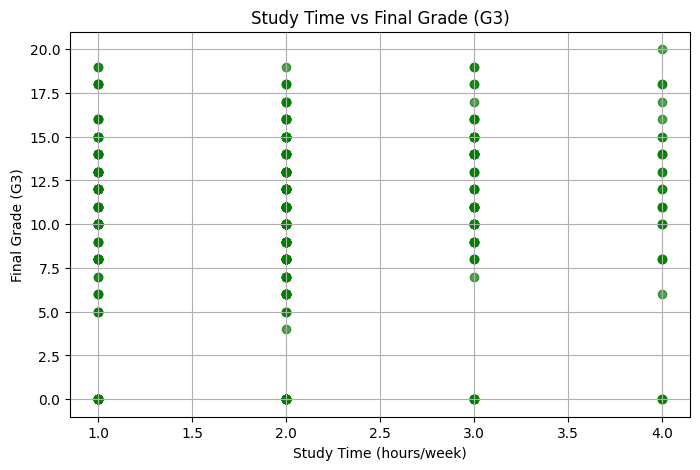

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(df['studytime'], df['G3'], color='green', alpha=0.7)
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time (hours/week)")
plt.ylabel("Final Grade (G3)")
plt.grid(True)
plt.show()


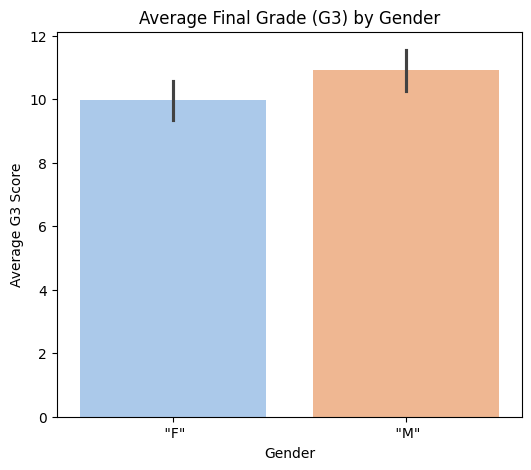

In [20]:
plt.figure(figsize=(6, 5))
sns.barplot(x='sex', y='G3', data=df, hue='sex', palette='pastel', legend=False)
plt.title("Average Final Grade (G3) by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3 Score")
plt.show()
